# Students analysis

## Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load data

Dataset from: https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset </br>
"A realistic, large-scale synthetic dataset of 10,000 students designed to analyze factors affecting college placements."

In [3]:
data = pd.read_csv("assets/college_student_placement_dataset.csv")
data

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [4]:
data.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

The data looks promising, but could be given a little correction.

### Preprocessing

College ID does not provide any useful information that could change the outcome of a placement, the column can be dropped.

In [5]:
data = data.drop(columns=["College_ID"])
data

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes
9996,70,9.25,9.34,7,No,0,7,2,No
9997,89,6.08,6.25,3,Yes,3,9,5,No
9998,107,8.77,8.92,3,No,7,5,1,No


Numbers are easier to work with than strings, thus there is no reason not to map Yes/No information to 1/0.

In [6]:
data["Internship_Experience"] = data["Internship_Experience"].map({"Yes": 1, "No": 0})
data["Placement"] = data["Placement"].map({"Yes": 1, "No": 0})

data

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0,1,8,0,1
9996,70,9.25,9.34,7,0,0,7,2,0
9997,89,6.08,6.25,3,1,3,9,5,0
9998,107,8.77,8.92,3,0,7,5,1,0


In [7]:
data.dtypes

IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience       int64
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                   int64
dtype: object

The data now holds only numeric values, which provide faster and better analysis.

It's good to remember about any missing values or duplicates when dealing with data.

In [8]:
data.isna().sum()

IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

Luckily, there is none. If there was, it shall rather be filled before analysing (with mean or other probable values) or taken into account when analysing.

## Analysing

Now data can be safely analysed.

In [10]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


Just from using ```DataFrame.describe()``` plenty of information can be known. Numbers of non-NA observations, mean, standard deviation, quartiles, min and max values can be read instantly.
</br>Changing datatypes from object (Yes/No) to numeric provided additional information:
- 16.6% of university placement were positive
- 39.6% of students have internship experience

### Single value analysis

It is good to search through values from every column and look for interesting information. 

#### IQ

In [11]:
data["IQ"].describe()

count    10000.000000
mean        99.471800
std         15.053101
min         41.000000
25%         89.000000
50%         99.000000
75%        110.000000
max        158.000000
Name: IQ, dtype: float64

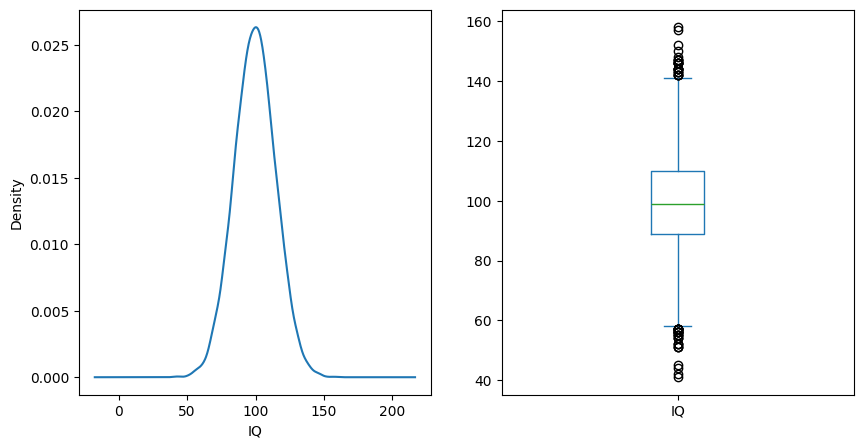

In [12]:
# ax = data["IQ"].plot.hist(bins=40, title = "IQ of students")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

data["IQ"].plot(ax=axes[0], kind="kde")
data["IQ"].plot(ax=axes[1], kind="box")

axes[0].set_xlabel("IQ")

plt.show()


These are students with average IQ of 99. From what I managed to find, average IQ of undergraduate students is 102 (according to: "Meta-analysis: On average, undergraduate students' intelligence is merely average"), which means the data discribes insignificantly below-average students.

#### Previous semester result

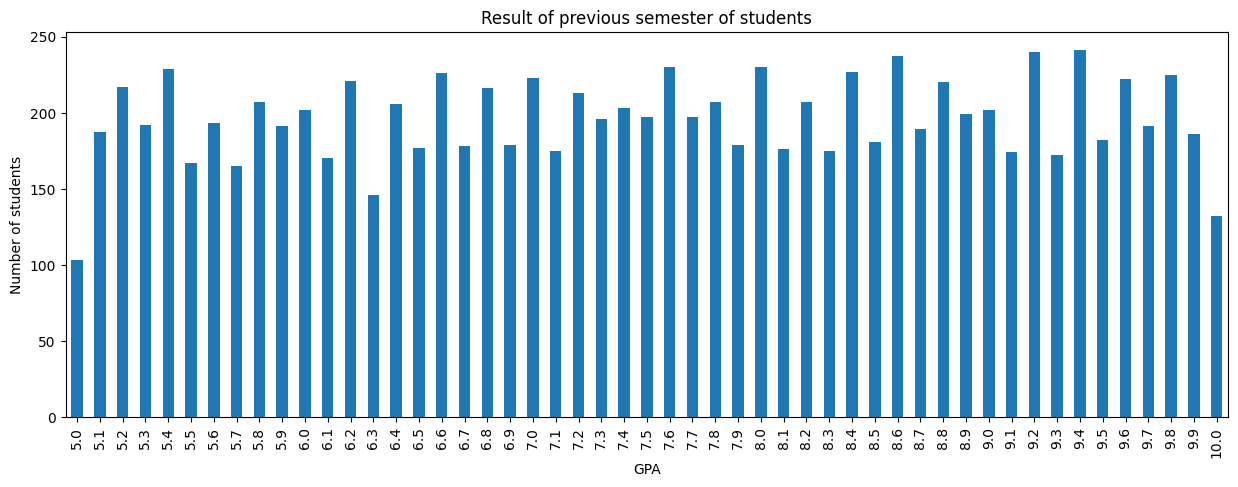

In [13]:
ax = data["Prev_Sem_Result"].round(1).value_counts().sort_index().plot.bar(title = "Result of previous semester of students", figsize=(15,5))
ax.set_xlabel("GPA")
ax.set_ylabel("Number of students")
plt.show()

I believe there is not much to be seen in case of GPA, only interesting aspect is that extreme values are least often achieved.

#### Cumulative GPA

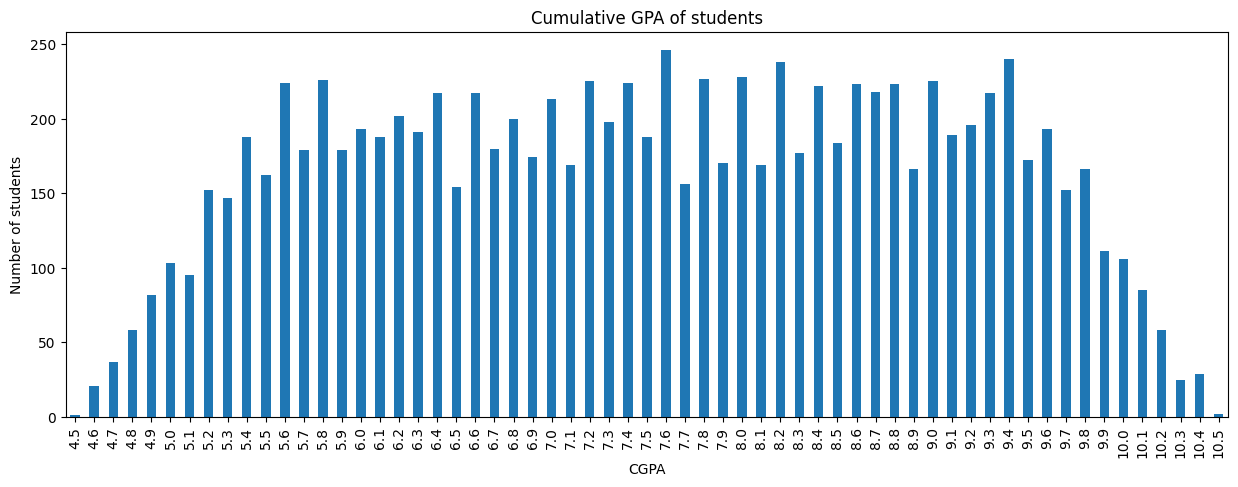

In [14]:
ax = data["CGPA"].round(1).value_counts().sort_index().plot.bar(title = "Cumulative GPA of students", figsize=(15,5))
ax.set_xlabel("CGPA")
ax.set_ylabel("Number of students")
plt.show()

In case of CGPA there is more Bell-like curve, with expected value around 7.5.

#### Academic performance

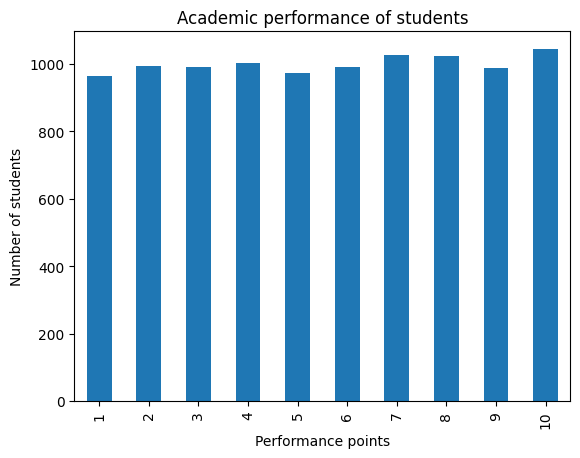

In [15]:
ax = data["Academic_Performance"].value_counts().sort_index().plot.bar(title = "Academic performance of students")
ax.set_xlabel("Performance points")
ax.set_ylabel("Number of students")
plt.show()

It seems that academic performance follows discrete uniform distribution $U\{1,10\}$.

#### Internship experience

In [16]:
data.value_counts("Internship_Experience").apply(lambda x: x*100/data.shape[0])

Internship_Experience
0    60.36
1    39.64
Name: count, dtype: float64

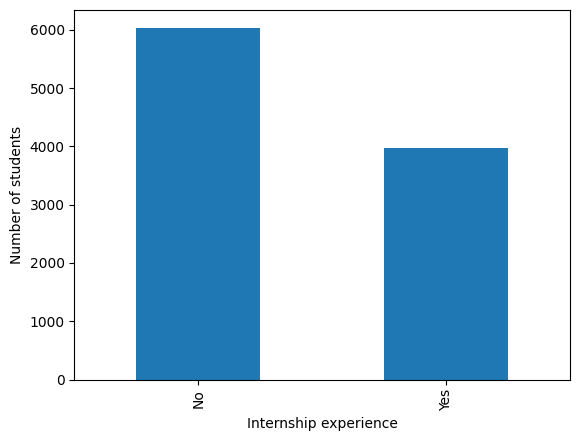

In [17]:
ax = data.value_counts("Internship_Experience").rename({0: "No", 1: "Yes"}, axis=0).plot.bar()
ax.set_xlabel("Internship experience")
ax.set_ylabel("Number of students")
plt.show()

We can see that most of the students, 60%, have no internship experience.

#### Extra curricular score

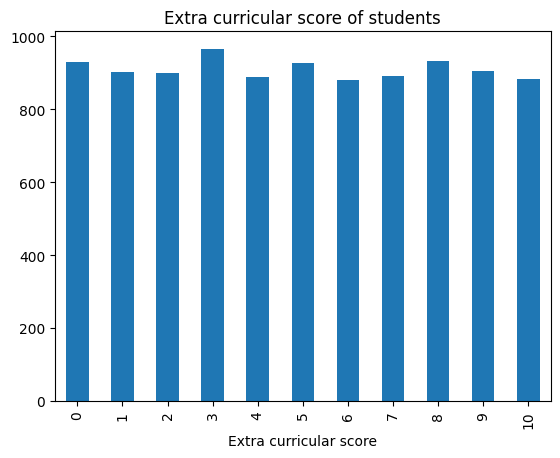

In [18]:
ax = data["Extra_Curricular_Score"].value_counts().sort_index().plot.bar(title = "Extra curricular score of students")
ax.set_xlabel("Extra curricular score")
plt.show()

It seems, that extra curricular score of students follows discrete uniform distribution $U\{0,10\}$.

#### Communication skills

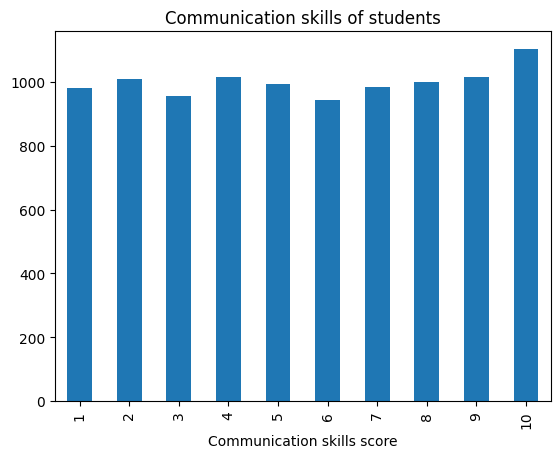

In [19]:
ax = data["Communication_Skills"].value_counts().sort_index().plot.bar(title = "Communication skills of students")
ax.set_xlabel("Communication skills score")
plt.show()

Though we can see a rise at the value of 10, it seems, that communication skills score follows discrete uniform distribution $U\{1,10\}$.

#### Projects completed

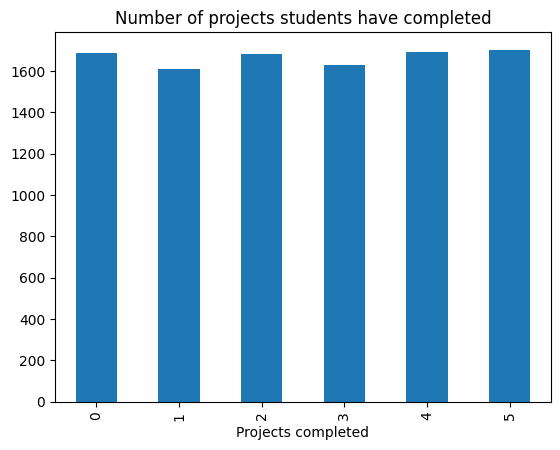

In [20]:
ax = data["Projects_Completed"].value_counts().sort_index().plot.bar(title = "Number of projects students have completed")
ax.set_xlabel("Projects completed")
plt.show()

It seems, that number of projects completed by students follows discrete uniform distribution $U\{0,5\}$.

### Placement analysis

Now that single column analysis is finished without mind-breaking results, it is time to move on and analyze relationship between columns. Here, it is more likely to see the data shine.

At first, it is wise to use ```sns.pairplot()``` (with hue as placement column as it is result of enrolling) in order to catch any out-of-ordinary information.

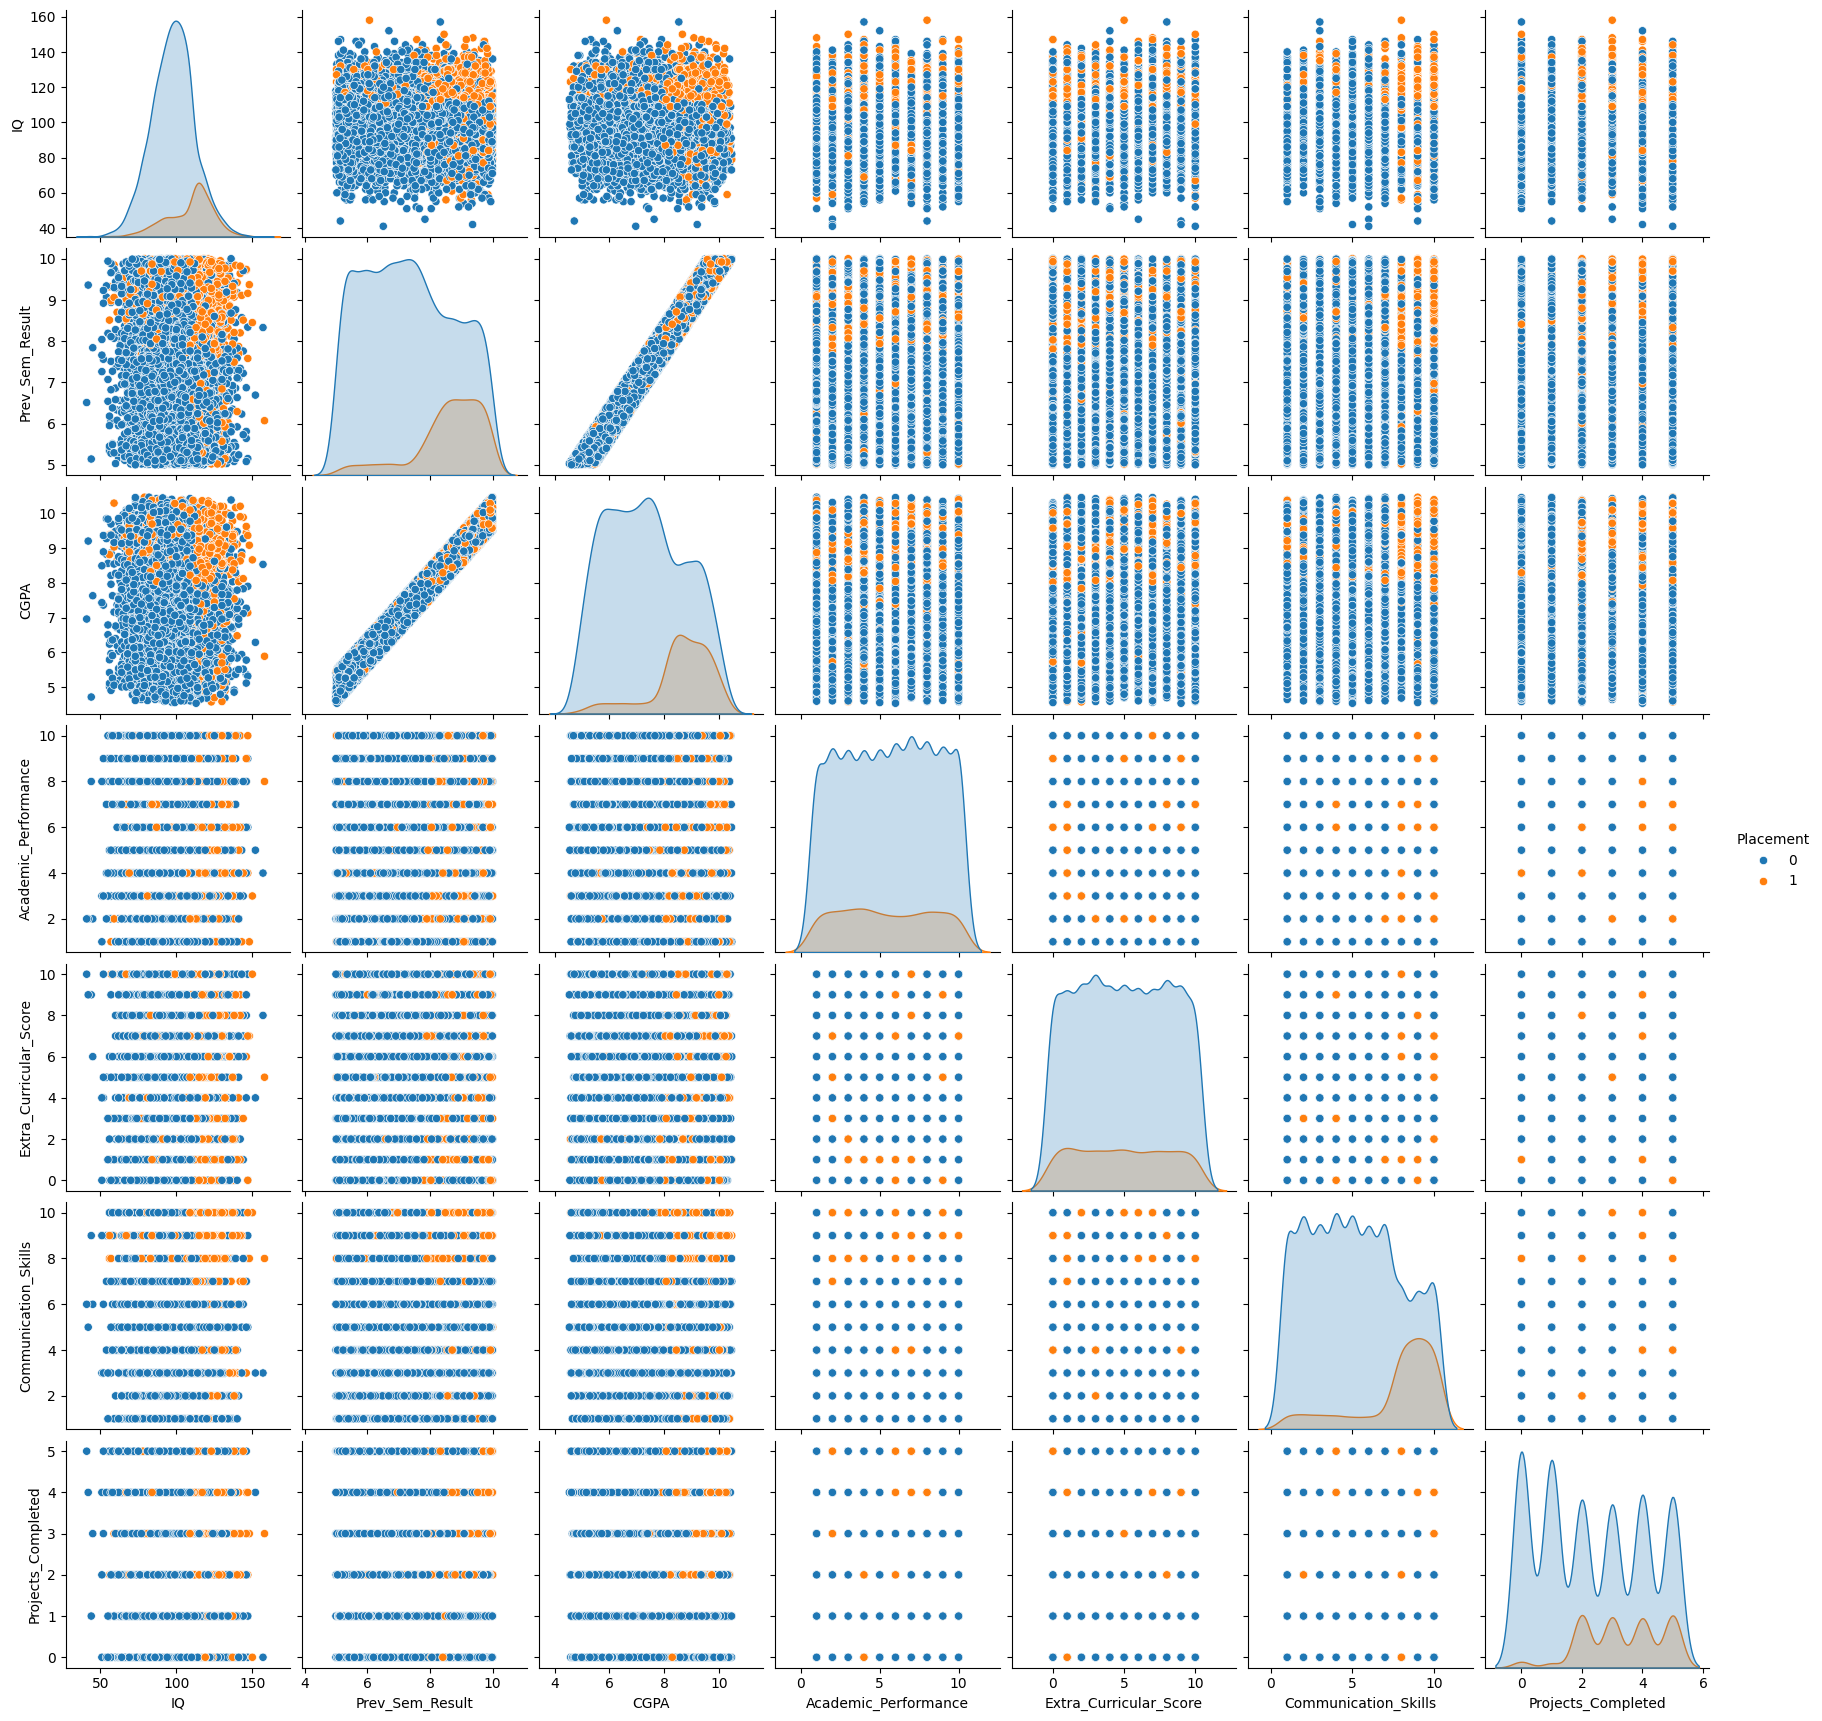

In [21]:
sns.pairplot(data, vars=["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance", "Extra_Curricular_Score", "Communication_Skills", "Projects_Completed"], hue="Placement")
plt.show()

Even though most of the subplots are crowded and not-readable (due to number and type of observations), there is plenty of information in the KDE (kernel density estime) plot.
- Peak in denisty of IQ of rejected students is lower than peak of the accepted ones
- Both previous semester and cumulative GPA is likely to be higher of accepted students
- Academic performance and extra curricular score does not seem to affect the result much, as scores of both accepted and rejected students seem to follow uniform distribution
- University tend to accept students with better communication skills
- Completing at least two projects increases chances of acceptance for students

#### IQ

In [22]:
data.groupby("Placement")["IQ"].mean().rename({0: "No", 1: "Yes"})

Placement
No      97.552452
Yes    109.121760
Name: IQ, dtype: float64

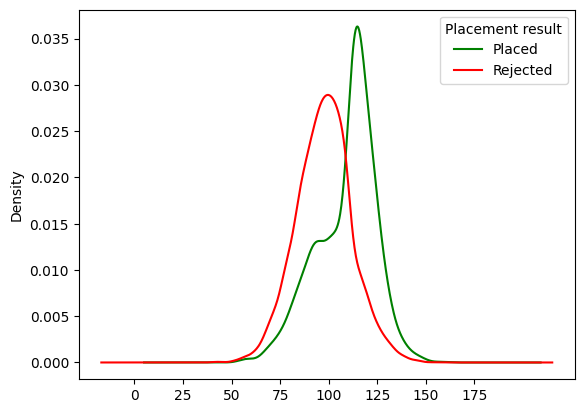

In [33]:
data.loc[data["Placement"] == 1]["IQ"].plot.kde(label="Placed", color="green")
data.loc[data["Placement"] == 0]["IQ"].plot.kde(label="Rejected", color="red")
plt.legend(title="Placement result")
plt.xticks(ticks=range(0, 200, 25))
plt.show()

It is visible, that students who were rejected tend to have lower IQ, around 98, and the spread of the values is higher comparing to students, who got accepted. The representative of the second group is more likely to have higher IQ, around 109, the spread is lower than in the first group. There is also a local maximum around 95 IQ, meaning there is a higher change to randomly come across a student with lower IQ that got placed, than the partciularly outstanding one.

#### Previous semester GPA

In [42]:
data.groupby("Placement")["Prev_Sem_Result"].mean()

Placement
0    7.330462
1    8.567420
Name: Prev_Sem_Result, dtype: float64

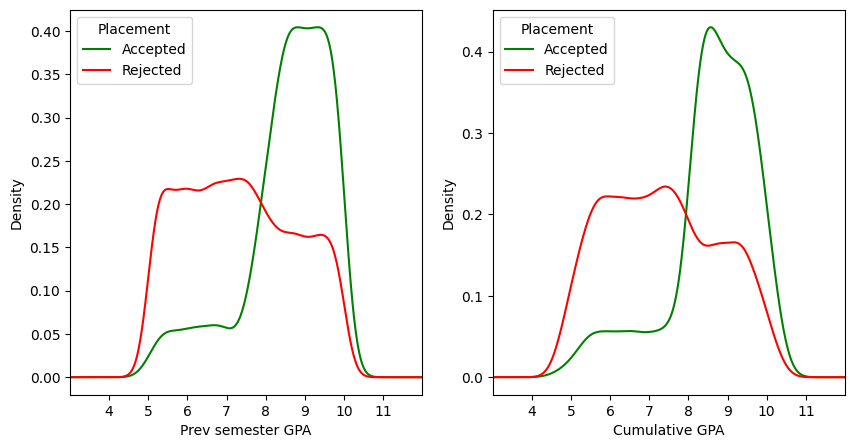

In [69]:
fig, GPA_axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))

data.loc[data["Placement"] == 1]["Prev_Sem_Result"].plot.kde(label="Accepted", color="Green", ax = GPA_axes[0])
data.loc[data["Placement"] == 0]["Prev_Sem_Result"].plot.kde(label="Rejected", color="Red", ax = GPA_axes[0])

data.loc[data["Placement"] == 1]["CGPA"].plot.kde(label="Accepted", color="Green", ax = GPA_axes[1])
data.loc[data["Placement"] == 0]["CGPA"].plot.kde(label="Rejected", color="Red", ax = GPA_axes[1])


GPA_axes[0].set_xlabel("Prev semester GPA")
GPA_axes[0].set_xlim(3, 12)
GPA_axes[0].set_xticks(ticks=range(4, 12, 1))
GPA_axes[0].legend(title="Placement")

GPA_axes[1].set_xlabel("Cumulative GPA")
GPA_axes[1].set_xlim(3, 12)
GPA_axes[1].set_xticks(ticks=range(4, 12, 1))
GPA_axes[1].legend(title="Placement")

plt.show()

Analyzing the chart, one could see, that GPA could be a clear predicator of placement, as most of the accepted students got their GPA (both cumulative and previous semester) around 8-10, while most of the rejected students have GPA around 5-7. The density of rejected students falls, where the GPA rises and the other way around.   

### Placement analysis

In [ ]:
data.value_counts("Placement")

Placement
0    8341
1    1659
Name: count, dtype: int64

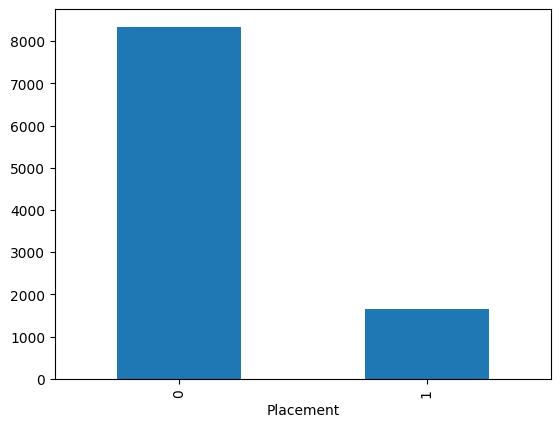

In [ ]:
ax = data.value_counts("Placement").plot.bar()

Internship_Experience     0     1
Placement                        
0                      5024  3317
1                      1012   647


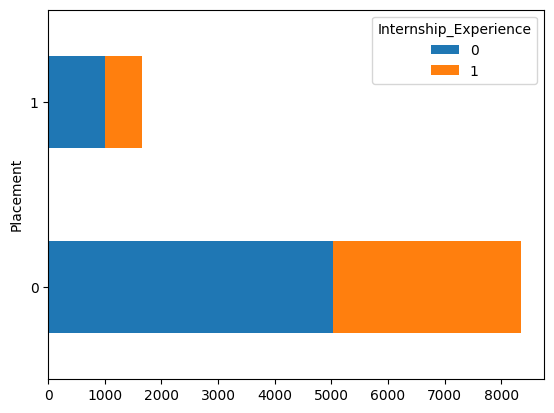

In [ ]:
print(data.value_counts(["Placement", "Internship_Experience"]).unstack(fill_value=0))
data.value_counts(["Placement", "Internship_Experience"]).unstack(fill_value=0).plot(kind="barh", stacked=True)
plt.show()

Academic_Performance   1    2    3    4    5    6    7    8    9    10
Placement                                                             
0                     793  828  816  816  817  843  878  852  824  874
1                     170  167  175  188  157  147  149  173  163  170


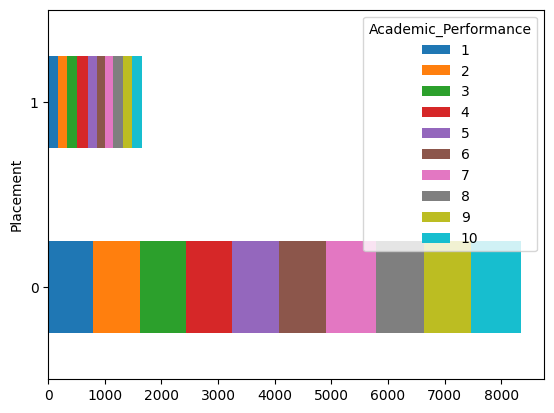

In [ ]:
print(data.value_counts(["Placement", "Academic_Performance"]).sort_index().unstack())
data.value_counts(["Placement", "Academic_Performance"]).sort_index().unstack().plot.barh(stacked=True)
plt.show()

Extra_Curricular_Score   0    1    2    3    4    5    6    7    8    9    10
Placement                                                                    
0                       773  732  759  811  746  764  747  737  787  756  729
1                       156  171  140  154  143  164  132  153  144  149  153


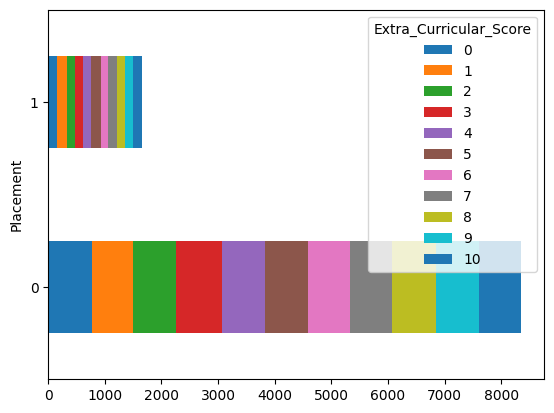

In [ ]:
print(data.value_counts(["Placement", "Extra_Curricular_Score"]).sort_index().unstack())
data.value_counts(["Placement", "Extra_Curricular_Score"]).sort_index().unstack().plot.barh(stacked=True)
plt.show()

Communication_Skills   1    2    3    4    5    6    7    8    9    10
Placement                                                             
0                     910  941  891  954  941  886  925  602  599  692
1                      70   67   64   63   54   56   59  398  417  411


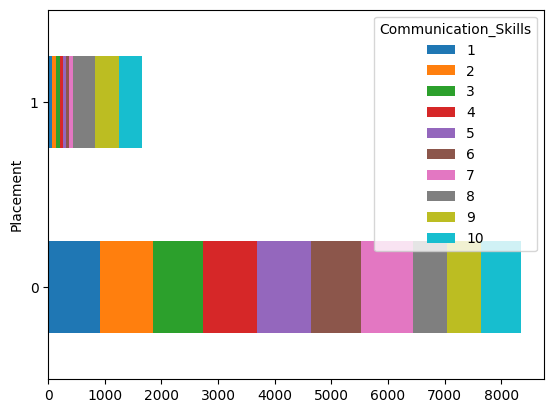

In [ ]:
print(data.value_counts(["Placement", "Communication_Skills"]).sort_index().unstack())
data.value_counts(["Placement", "Communication_Skills"]).sort_index().unstack().plot.barh(stacked=True)
plt.show()

It is plainly visible that students with high communication skills were more likely to get a place at the university.

Projects_Completed     0     1     2     3     4     5
Placement                                             
0                   1643  1576  1274  1238  1312  1298
1                     45    33   407   389   381   404


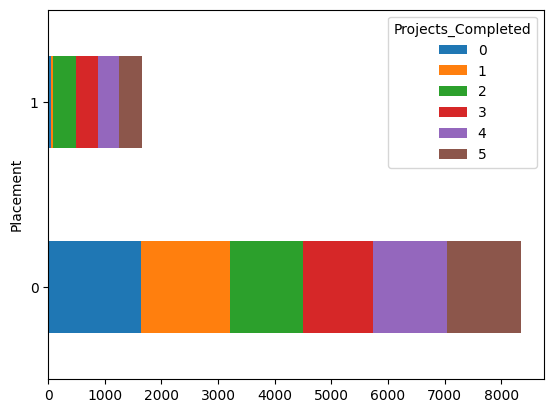

In [ ]:
print(data.value_counts(["Placement", "Projects_Completed"]).sort_index().unstack())
data.value_counts(["Placement", "Projects_Completed"]).sort_index().unstack().plot.barh(stacked=True)
plt.show()